## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [8]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

In [9]:
type('Country or Area')

str

In [10]:
type('Year')

str

In [11]:
type('Value')

str

In [12]:
type('Value Footnotes')

str

In [13]:
type(gdp_df)

pandas.core.frame.DataFrame

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

8219 rows, 4 columns; Country or Area = Str; Year = Str (looks like Int); Value = Str (looks like Float); Value Footnotes = Str (says it's NaN)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [17]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 


233 countries have data for all years.  The following countries are missing > 10 years worth of data:

Virgin Islands                                        
Cayman Islands                                        
Faroe Islands                                         
Kosovo                                                
Sint Maarten (Dutch part)                             
Turks and Caicos Islands                              
Djibouti     

One pattern that emerges from this is that 5 of the 7 countries which are missing significant amounts of data are island nations.  

In [20]:
##counting the number of years per country value
pd.set_option('display.max_rows', None)
gdp_df['Country'].value_counts()

Country
Latvia                                                34
North America                                         34
Mongolia                                              34
Morocco                                               34
Mozambique                                            34
Myanmar                                               34
Namibia                                               34
Nauru                                                 34
Nepal                                                 34
Netherlands                                           34
New Zealand                                           34
Nicaragua                                             34
Niger                                                 34
Nigeria                                               34
North Macedonia                                       34
Middle income                                         34
Norway                                                34
OECD members           

In [21]:
##counting number of countries per year value
pd.set_option('display.max_rows', None)
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


The distribution of the data is skewed towards the lower end values.  The violin plot is basically the the density plot turned upright and then mirrored.  The outliers are significantly more visible in the boxplot.  

In [24]:
##filter data into a new variable to contain only 2020 data
year_2020 = gdp_df[gdp_df['Year'] == 2020]
print(year_2020)

                                                Country  Year  GDP_Per_Capita
3                                           Afghanistan  2020     2769.685745
27                          Africa Eastern and Southern  2020     3861.111238
61                           Africa Western and Central  2020     4622.731427
95                                              Albania  2020    14650.395929
129                                             Algeria  2020    14194.155748
163                                             Andorra  2020    55488.490299
197                                              Angola  2020     7556.967928
231                                 Antigua and Barbuda  2020    23915.161984
265                                          Arab World  2020    15316.627200
299                                           Argentina  2020    23877.093140
333                                             Armenia  2020    15052.935979
367                                               Aruba  2020   

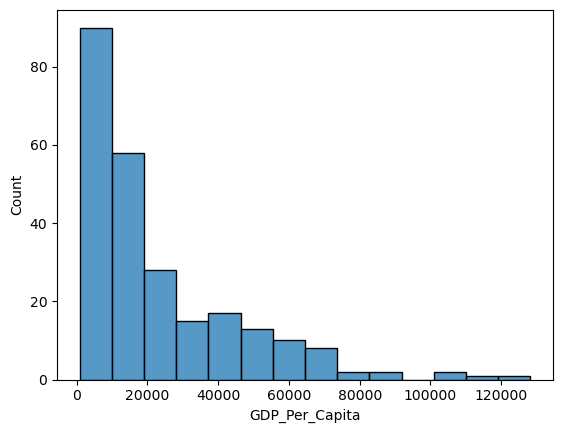

In [25]:
##histogram code
sns.histplot(data=year_2020, x="GDP_Per_Capita")
plt.show()

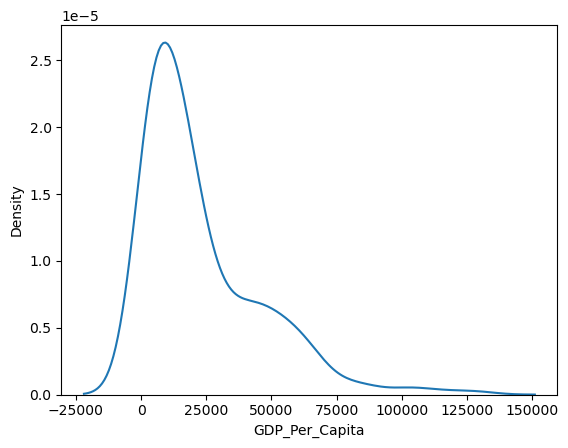

In [26]:
##density plot
sns.kdeplot(year_2020['GDP_Per_Capita'])
plt.show()

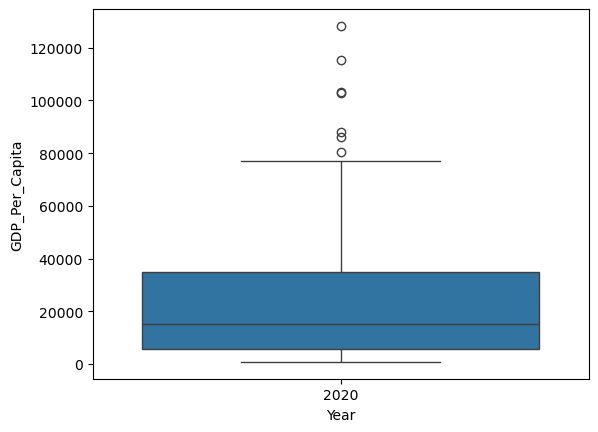

In [27]:
##boxplot
sns.boxplot( x=year_2020['Year'], y=year_2020['GDP_Per_Capita'])
plt.show()

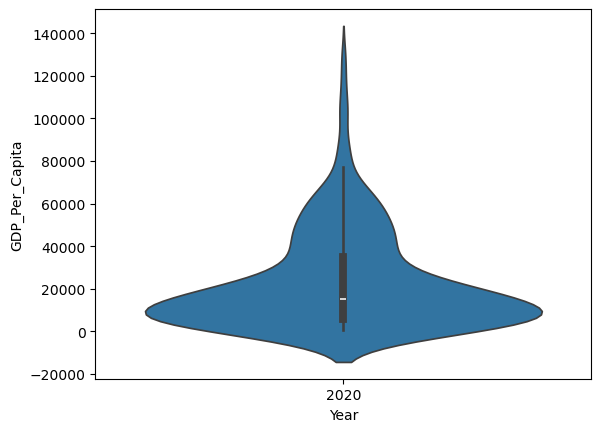

In [28]:
##violin plot
sns.violinplot(x=year_2020['Year'], y=year_2020['GDP_Per_Capita'])
plt.show()

9. What was the median GDP per capita value in 2020?

Median GDP in 2020: 15309.24

In [31]:
print(year_2020['GDP_Per_Capita'].median())

15309.23598817024


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


ANSWER: GDP values appear to increase over time.  This is most easily viewed on the bar chart or the regression line on the scatter plot, which has a clear upward trajectory.  The boxplot also illustrates this effectively, but is a little more confusing with the confidence interval bars.  The scatterplot sans regression line is the least effective at communicating this as it just looks like a lot of clustered dots with no strong way to identify any sort of median or mean value as everything is lumped together tightly.  The outliers also make it confusing to interpret.  

In [34]:
## grouping the data by the four years requested
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
print(gdp_decades)

                                                Country  Year  GDP_Per_Capita
3                                           Afghanistan  2020     2769.685745
13                                          Afghanistan  2010     2848.586061
23                                          Afghanistan  2000     1617.826475
27                          Africa Eastern and Southern  2020     3861.111238
37                          Africa Eastern and Southern  2010     3863.836012
47                          Africa Eastern and Southern  2000     3176.568655
57                          Africa Eastern and Southern  1990     3386.854480
61                           Africa Western and Central  2020     4622.731427
71                           Africa Western and Central  2010     4343.405839
81                           Africa Western and Central  2000     3139.324872
91                           Africa Western and Central  1990     3299.401375
95                                              Albania  2020   

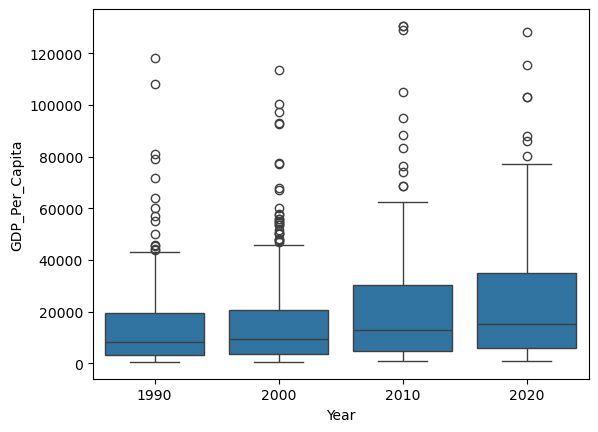

In [35]:
## box plot, Years x GDP_per_capita

sns.boxplot( x = gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])
plt.show()

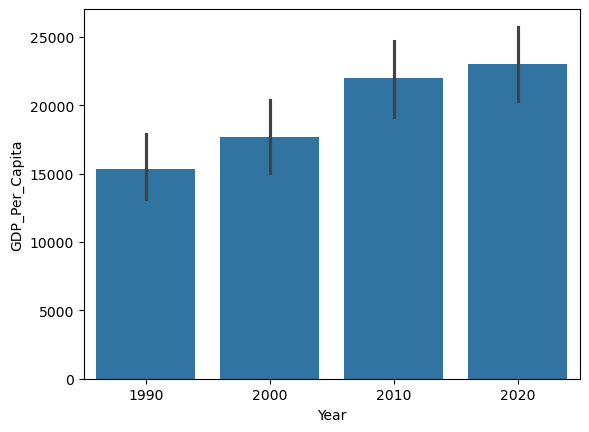

In [36]:
##bar plot, Year x GDP
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.show()

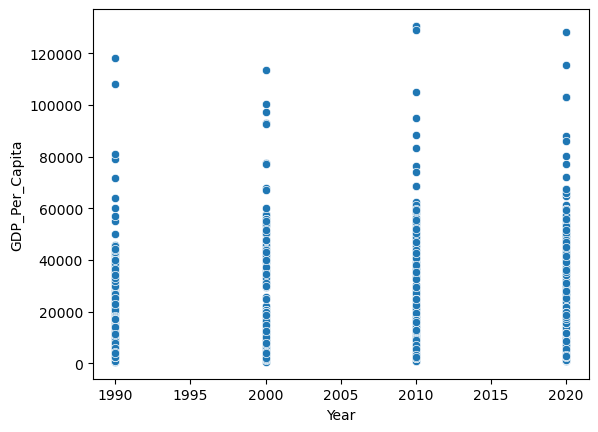

In [37]:
##scatterplot
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])
plt.show()

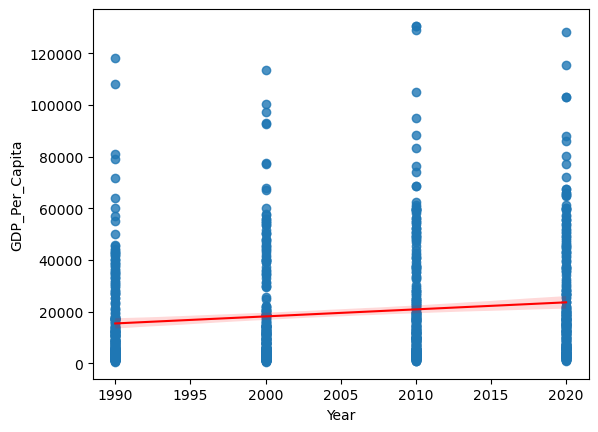

In [38]:
## scatterplot w/regression line
sns.regplot(
    x=gdp_decades['Year'], 
    y=gdp_decades['GDP_Per_Capita'], 
    line_kws={"color": "red", "linewidth": 1.5})
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?


ANSWER: According to the output below, both Brunei and the United Arab Emerates achieved this in 1990.

In [41]:
gdp_100K = gdp_df[gdp_df['GDP_Per_Capita'].astype(int) >= 100000]
print(gdp_100K)

                   Country  Year  GDP_Per_Capita
750                Bermuda  2011   101174.504104
751                Bermuda  2010   105121.639689
752                Bermuda  2009   108091.644563
753                Bermuda  2008   115015.749469
754                Bermuda  2007   117742.118950
755                Bermuda  2006   114250.093078
756                Bermuda  2005   108461.234809
757                Bermuda  2004   106941.298273
758                Bermuda  2003   104798.346290
759                Bermuda  2002   101739.790229
760                Bermuda  2001   103724.861800
958                 Brunei  2006   102248.510373
960                 Brunei  2004   101497.754705
961                 Brunei  2003   103226.914282
962                 Brunei  2002   101571.583793
964                 Brunei  2000   100323.440022
967                 Brunei  1997   106503.420292
968                 Brunei  1996   102522.125236
969                 Brunei  1995   105043.852684
970                 

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


ANSWER: Luxembourg (did not see that coming...)

In [44]:
## checks that 2020 data again, sorted by GDP descending
year_2020 = gdp_df[gdp_df['Year'] == 2020]
GDP_des = year_2020.sort_values('GDP_Per_Capita', ascending = False)
print(GDP_des)

                                                Country  Year  GDP_Per_Capita
4426                                         Luxembourg  2020   128256.560341
6514                                          Singapore  2020   115304.149459
6119                                              Qatar  2020   103061.913414
3493                                            Ireland  2020   102989.787335
741                                             Bermuda  2020    87894.401174
5541                                             Norway  2020    86018.320698
944                                              Brunei  2020    80280.897948
7208                                        Switzerland  2020    77197.646592
1284                                     Cayman Islands  2020    72149.326889
2745                                          Greenland  2020    67560.253903
7865                                      United States  2020    67352.387139
5473                                      North America  2020   

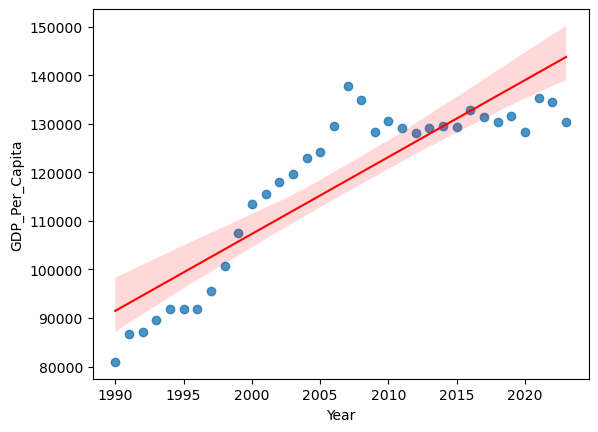

In [45]:
## Grabs data for Luxembourg only, then graphs on scatterplot w/regression line
Lux_GDP = gdp_df[gdp_df['Country'] == 'Luxembourg']
sns.regplot(
    x=Lux_GDP['Year'],
    y=Lux_GDP['GDP_Per_Capita'],
    line_kws={'color': 'red', 'linewidth': 1.5},
)
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


ANSWER: Burundi (graph below)

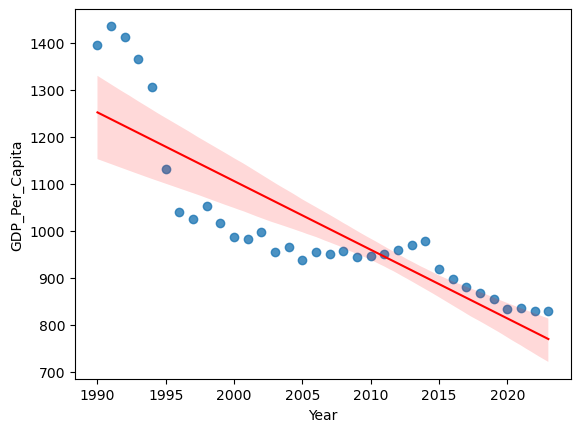

In [81]:
## grabs 2020 data for Burundi, which according to the previous query is shown as the lowest GDP country for 2020
Bur_GDP = gdp_df[gdp_df['Country'] == 'Burundi']
sns.regplot(
    x=Bur_GDP['Year'],
    y=Bur_GDP['GDP_Per_Capita'],
    line_kws={'color': 'red', 'linewidth': 1.5},
)
plt.show()

In [89]:
## Checking on the bonus, grabbing 2020 and 1990 data... and this didn't work.  Coming back later.
gdp_1990 = gdp_df[gdp_df['Year'].isin([1990])] 
gdp_2020 = gdp_df[gdp_df['Year'].isin([2020])] 
if gdp_1990['GDP_Per_Capita'] > gdp_2020['GDP_Per_Capita']:
    print(gdp_1990['Country'])


ValueError: Can only compare identically-labeled Series objects

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [144]:
## reads in CSV (removing footnote rows)
internet_df = pd.read_csv(r"C:\Users\ekims\Documents\NSS\DA14\Projects\gdp-and-internet-usage-ekimshaf\data\internet_use.csv", nrows=6083)
print(internet_df.head(10))  ## prints first 10 rows
print(internet_df.tail(10))  ## prints last 10 rows
print(type('Country or Area'))  ## type
print(type('Year'))  ## type
print(type('Value')) ## type

  Country or Area  Year     Value Value Footnotes
0     Afghanistan  2019  17.60000               1
1     Afghanistan  2018  16.80000               2
2     Afghanistan  2017  13.50000               3
3     Afghanistan  2016  11.00000               4
4     Afghanistan  2015   8.26000               4
5     Afghanistan  2014   7.00000               4
6     Afghanistan  2013   5.90000               4
7     Afghanistan  2012   5.45455               4
8     Afghanistan  2011   5.00000               4
9     Afghanistan  2010   4.00000               4
     Country or Area  Year     Value Value Footnotes
6073        Zimbabwe  2002  1.100000               4
6074        Zimbabwe  2001  0.799846             NaN
6075        Zimbabwe  2000  0.401434             NaN
6076        Zimbabwe  1999  0.161676             NaN
6077        Zimbabwe  1998  0.081648             NaN
6078        Zimbabwe  1997  0.033080             NaN
6079        Zimbabwe  1996  0.016790             NaN
6080        Zimbabwe  1995